<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Hypothesis_Testing_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp <- 0.06

# Calculate the standard error
std_error <- late_shipments_boot_distn %>% 
  summarize(sd_late_prop = sd(late_prop)) %>% 
  pull(sd_late_prop)

# Find z-score of late_prop_samp
z_score <- (late_prop_samp - late_prop_hyp) / std_error

# See the results
z_score

In [ ]:
# Calculate 95% confidence interval using quantile method
conf_int_quantile <- late_shipments_boot_distn %>%
  summarize(
    lower = quantile(prop_late_shipments, 0.025),
    upper = quantile(prop_late_shipments, 0.975)
  )

# See the result
conf_int_quantile

In [ ]:
# Calculate the numerator of the test statistic
numerator <- xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator <- sqrt(s_no ^ 2 / n_no + s_yes ^ 2 / n_yes)

# Calculate the test statistic
t_stat <- numerator / denominator

# See the result
t_stat

In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom <- n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value <- pt(t_stat, df = degrees_of_freedom)

# See the result
p_value

In [ ]:
# View the dem_votes_potus_12_16 dataset
View(dem_votes_potus_12_16)

# Calculate the differences from 2012 to 2016
sample_dem_data <- dem_votes_potus_12_16 %>% 
  mutate(diff = dem_percent_12 - dem_percent_16)

# See the result
sample_dem_data

In [ ]:
diff_stats <- sample_dem_data %>%
  summarize(
    xbar_diff = mean(diff),
    s_siff = sd(diff) 
  )

In [ ]:
# From previous step
sample_dem_data <- dem_votes_potus_12_16 %>% 
  mutate(diff = dem_percent_12 - dem_percent_16)

# Using sample_dem_data, plot diff as a histogram
ggplot(sample_dem_data, aes(x = diff)) +
  geom_histogram(binwidth = 1)


In [ ]:
# Conduct a t-test on diff
test_results <- t.test(sample_dem_data$diff, alternative = "greater", mu = 0)

# See the results
test_results

In [ ]:
p.adjust.methods

[1] "holm"       "hochberg"   "hommel"     "bonferroni" "BH"        
[6] "BY"         "fdr"        "none"

In [ ]:
# Using late_shipments, group by shipment mode, and 
# calculate the mean and std dev of pack price
late_shipments %>%
    group_by(shipment_mode) %>%
    summarize(
        xbar_pack_price = mean(pack_price),
        s_pack_price = sd(pack_price)
    )

In [ ]:
# Using late_shipments, plot pack_price vs. shipment_mode
# as a box plot with flipped x and y coordinates
ggplot(late_shipments, aes(x = shipment_mode, y = pack_price)) +
  geom_boxplot() +
  coord_flip()

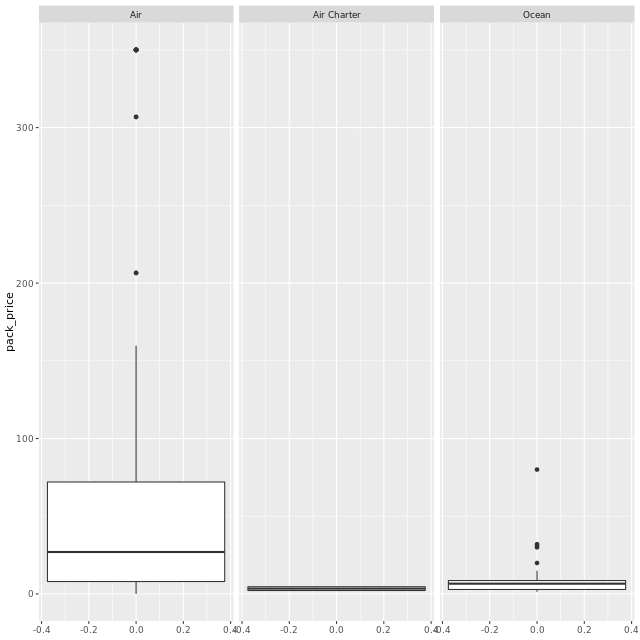

In [ ]:
# Run a linear regression of pack price vs. shipment mode 
mdl_pack_price_vs_shipment_mode <- lm(
    pack_price ~ shipment_mode, 
    data = late_shipments
)

# See the results
summary(mdl_pack_price_vs_shipment_mode)

In [ ]:
# From previous step
mdl_pack_price_vs_shipment_mode <- lm(pack_price ~ shipment_mode, data = late_shipments)

# Perform ANOVA on the regression model
anova(mdl_pack_price_vs_shipment_mode)

In [ ]:
# Perform pairwise t-tests on pack price, grouped by
# shipment mode, no p-value adjustment
test_results <- pairwise.t.test(
    late_shipments$pack_price,
    late_shipments$shipment_mode,
    alternative = "two.sided",
    p.adjust.method = "none"
)

# See the results
test_results

In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 <- 0.06

# Calculate the sample proportion of late shipments
p_hat <- late_shipments %>%
  summarize(prop_late = mean(late == "Yes")) %>%
  pull(prop_late)

# Calculate the sample size
n <- nrow(late_shipments)

In [ ]:
# From previous step
p_0 <- 0.06
p_hat <- late_shipments %>%
  summarize(prop_late = mean(late == "Yes")) %>%
  pull(prop_late)
n <- nrow(late_shipments)

# Calculate the numerator of the test statistic
numerator <- p_hat - p_0

# Calculate the denominator of the test statistic
denominator <- sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score <- numerator / denominator

# See the result
z_score

In [ ]:
# From previous step
p_0 <- 0.06
p_hat <- late_shipments %>%
  summarize(prop_late = mean(late == "Yes")) %>%
  pull(prop_late)
n <- nrow(late_shipments)
numerator <- p_hat - p_0
denominator <- sqrt(p_0 * (1 - p_0) / n)
z_score <- numerator / denominator

# Calculate the p-value from the z-score
p_value <- pnorm(z_score, lower.tail=FALSE)

# See the result
p_value

In [ ]:
library(infer)

stack_overflow %>%
  prop_test(
    hobbyist ~ age_cat,                     # proportions ~ categories
    order = c("At least 30", "Under 30"),   # which p-hat to subract
    success = "Yes",
    alternative = "two-sided",
    correct = FALSE                         # Yates' continuity correction for small samples
  )

In [ ]:
# See the sample variables
print(p_hats)
print(ns)

# Calculate the pooled estimate of the population proportion
p_hat <- weighted.mean(p_hats, ns)
# Or explicitly using 
# (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# See the result
p_hat

In [ ]:
# See the sample variables
print(p_hats)
print(ns)

# Calculate the pooled estimate of the population proportion
p_hat <- weighted.mean(p_hats, ns)
# Or explicitly using 
# (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# See the result
p_hat

In [ ]:
# From previous steps
p_hat <- weighted.mean(p_hats, ns)
p_hat_times_not_p_hat <- p_hat * (1 - p_hat)
p_hat_times_not_p_hat_over_ns <- p_hat_times_not_p_hat / ns
std_error <- sqrt(sum(p_hat_times_not_p_hat_over_ns))


In [ ]:
# From previous steps
p_hat <- weighted.mean(p_hats, ns)
p_hat_times_not_p_hat <- p_hat * (1 - p_hat)
p_hat_times_not_p_hat_over_ns <- p_hat_times_not_p_hat / ns
std_error <- sqrt(sum(p_hat_times_not_p_hat_over_ns))
z_score <- (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value <- pnorm(z_score, lower.tail = FALSE)

# See the result
p_value

In [ ]:
# Perform a proportion test appropriate to the hypotheses 
test_results <- late_shipments %>% 
  prop_test(
    late ~ freight_cost_group,
    order = c("expensive", "reasonable"),
    success = "Yes",
    alternative = "greater",
    correct = FALSE
  )

# See the results
test_results

In [ ]:
library(infer)

stack_overflow %>%
  chisq_test(age_cat ~ job_sat)

In [ ]:
# Plot vendor_inco_term filled by freight_cost_group.
# Make it a proportional stacked bar plot.
ggplot(late_shipments, aes(x = vendor_inco_term, fill = freight_cost_group)) +
    geom_bar(position = "fill")

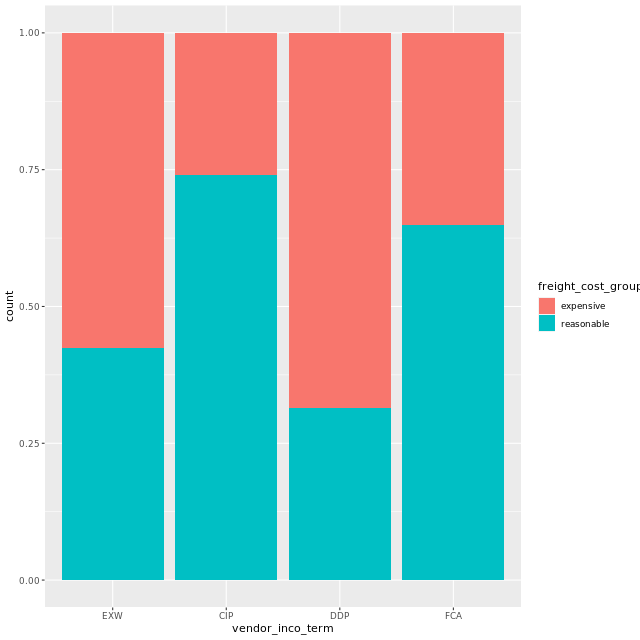

In [ ]:
# From previous step
vendor_inco_term_counts <- late_shipments %>% 
  count(vendor_inco_term)
n_total <- nrow(late_shipments)
hypothesized <- tribble(
  ~ vendor_inco_term, ~ prop,
  "EXW", 0.75,
  "CIP", 0.05,
  "DDP", 0.1,
  "FCA", 0.1
) %>%
  mutate(n = prop * n_total)

# Using vendor_inco_term_counts, plot n vs. vendor_inco_term 
ggplot(vendor_inco_term_counts,  aes(vendor_inco_term, n)) +
  # Make it a (precalculated) bar plot
  geom_col() +
  # Add points from hypothesized 
  geom_point(data = hypothesized)

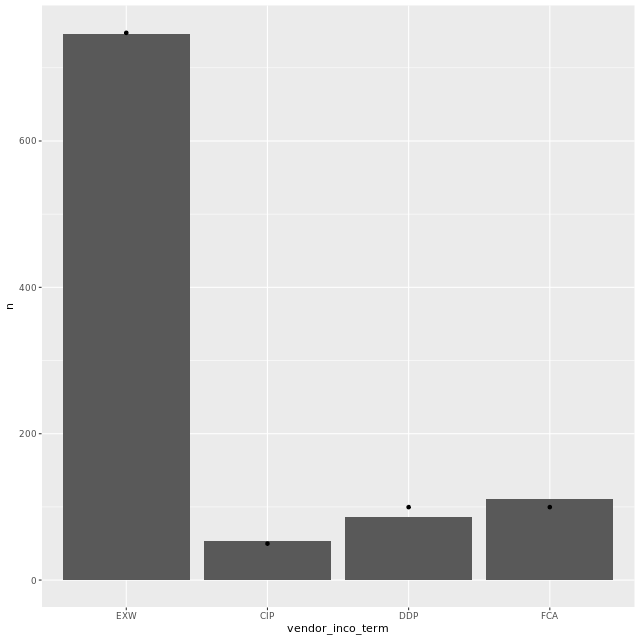

In [ ]:
hypothesized_props <- c(
  EXW = 0.75, CIP = 0.05, DDP = 0.1, FCA = 0.1
)

# Run chi-square goodness of fit test on vendor_inco_term
test_results <- late_shipments %>% 
  chisq_test(
    response = vendor_inco_term,
    p = hypothesized_props
  )

# See the results
test_results

In [ ]:
libary(infer)


stack_overflow_imbalanced %>%
  specify(hobbyist ~ age_cat, success = "Yes") %>% # response ~ explanatory
  hypothesize(null = "independence") %>% # or point


In [ ]:
# Perform a proportion test appropriate to the hypotheses 
test_results <- late_shipments %>% 
  prop_test(
    late ~ freight_cost_group,
    order = c("expensive", "reasonable"),
    success = "Yes",
    alternative = "greater",
    correct = FALSE
  )

# See the results
test_results

In [ ]:
# Extend the pipeline to calculate the difference in 
# proportions (expensive minus reasonable)
null_distn <- late_shipments %>% 
  specify(
    late ~ freight_cost_group, 
    success = "Yes"
  ) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 2000, type = "permute") %>% 
  calculate(
    stat = "diff in props", 
    order = c("expensive", "reasonable")
  )

# See the result
null_distn

In [ ]:
null_distn <- late_shipments %>% 
  specify(
    late ~ freight_cost_group, 
    success = "Yes"
  ) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 2000, type = "permute") %>% 
  calculate(
    stat = "diff in props", 
    order = c("expensive", "reasonable")
  )

# Copy, paste, and modify the pipeline to get the observed statistic
obs_stat <- late_shipments %>% 
  specify(
    late ~ freight_cost_group, 
    success = "Yes"
  ) %>% 
  calculate(
    stat = "diff in props", 
    order = c("expensive", "reasonable")
  )

# See the result
obs_stat

In [ ]:
# From previous steps
null_distn <- late_shipments %>% 
  specify(
    late ~ freight_cost_group, 
    success = "Yes"
  ) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 2000, type = "permute") %>% 
  calculate(
    stat = "diff in props", 
    order = c("expensive", "reasonable")
  )
obs_stat <- late_shipments %>% 
  specify(
    late ~ freight_cost_group, 
    success = "Yes"
  ) %>% 
  calculate(
    stat = "diff in props", 
    order = c("expensive", "reasonable")
  )

# Visualize the null dist'n, adding a vertical line at
# the observed statistic
visualize(null_distn) +
  geom_vline(aes(xintercept = stat), data = obs_stat)